In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits")

collated_data["HVCs"]

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Collating RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


Name,SkyCoord,RAJ2000,DEJ2000,VLSR,e_VLSR,VGSR,Vdev,FWHM,TbFit,NH,e_NH,Area,dx,dy,Flag,HI,WW91,Simbad,recno,Cat,Nearest RM
,"deg,deg",,,km / s,km / s,km / s,km / s,km / s,K,1 / cm2,1 / cm2,deg2,deg,deg,,,,,,,deg
str15,SkyCoord,str11,str9,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str4,str19,str18,str6,int32,str4,float64
G038.7-37.3-241,"318.95132749810114,-11.83861664753068",21 15 48.32,-11 50 19,-241.4,1.0,-131.9,-203.9,12.2,0.87,3e+19,1e+18,1.5,4.2,3.0,"T,H6",HVC 038.9-37.1-230,"GCN_GCN,EN,MS_MS",Simbad,329,GHVC,0.18999947004444442
G038.8-33.2-261,"315.26399401780566,-10.006394575192065",21 01 03.36,-10 00 23,-261.0,1.0,-145.6,-223.5,20.7,0.94,4e+19,2e+18,2.2,4.9,3.9,"T,H8",HVC 039.0-33.4-256,"GCN_GCN,EN,MS_MS",Simbad,330,GHVC,0.11689431635833333
G043.4-30.4-230,"314.53824383026614,-5.268616824159749",20 58 09.18,-05 16 07,-230.7,1.0,-100.4,-193.2,22.9,0.64,3e+19,2e+18,1.6,3.4,3.0,H1,HVC 043.1-30.0-218,"GCN_GCN,EN,N,MS_MS",Simbad,354,GHVC,0.1480177971361111
G089.0-64.7-311,"359.0471191770445,-5.603613730466462",23 56 11.31,-05 36 13,-311.7,1.0,-217.9,-274.2,18.9,0.50,2e+19,2e+18,1.4,3.4,3.1,H3,HVC 089.4-64.7-314,"EN,MS_MS",Simbad,408,GHVC,0.10718682865555557
G133.5-75.6-294,"15.548161692114391,-13.005834286896315",01 02 11.56,-13 00 21,-294.1,1.8,-254.6,-261.6,26.8,0.42,2e+19,3e+18,1.3,4.2,1.4,H2,HVC 131.9-75.8-302,"EN,MS_MS",Simbad,427,GHVC,0.048293947366666666
G248.9+36.8+181,"152.03907642863186,-8.363884064380029",10 08 09.38,-08 21 50,181.6,4.6,17.3,139.1,22.4,0.13,1e+19,2e+18,1.1,2.1,1.6,--,--,"WA,P,EP",Simbad,588,GHVC,0.17119747194444443
G261.5-34.5+237,"80.51641498466985,-53.96443940870481",05 22 03.94,-53 57 52,237.0,2.7,57.8,194.5,26.6,0.28,6e+18,3e+18,1.5,2.6,2.0,H1,HVC 261.5-34.6+237,"P,MS_MS,EP",Simbad,722,GHVC,0.11800674041944445
G262.4-26.2+143,"94.79587147051343,-54.00693872468238",06 19 11.01,-54 00 25,143.6,1.9,-52.0,101.1,19.5,0.28,1e+19,2e+18,1.6,3.1,2.6,H1,HVC 261.8-26.0+148,"P,MS_MS",Simbad,729,GHVC,0.06030011547777778


In [2]:
mask_arr = collated_data["HVCs"]["SkyCoord"].galactic.b.value

mask = list(map(lambda x: abs(x) > 20, mask_arr))

sum(mask)

hvcs = []

for i in range(len(mask)):
    if mask[i]:
        hvcs.append(i)

print(len(hvcs))
print(hvcs)

15
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 22, 24]


=== GENERATING MULTIPLE HVC PLOTS ===
Calculating HVC data
Plotting HVC data


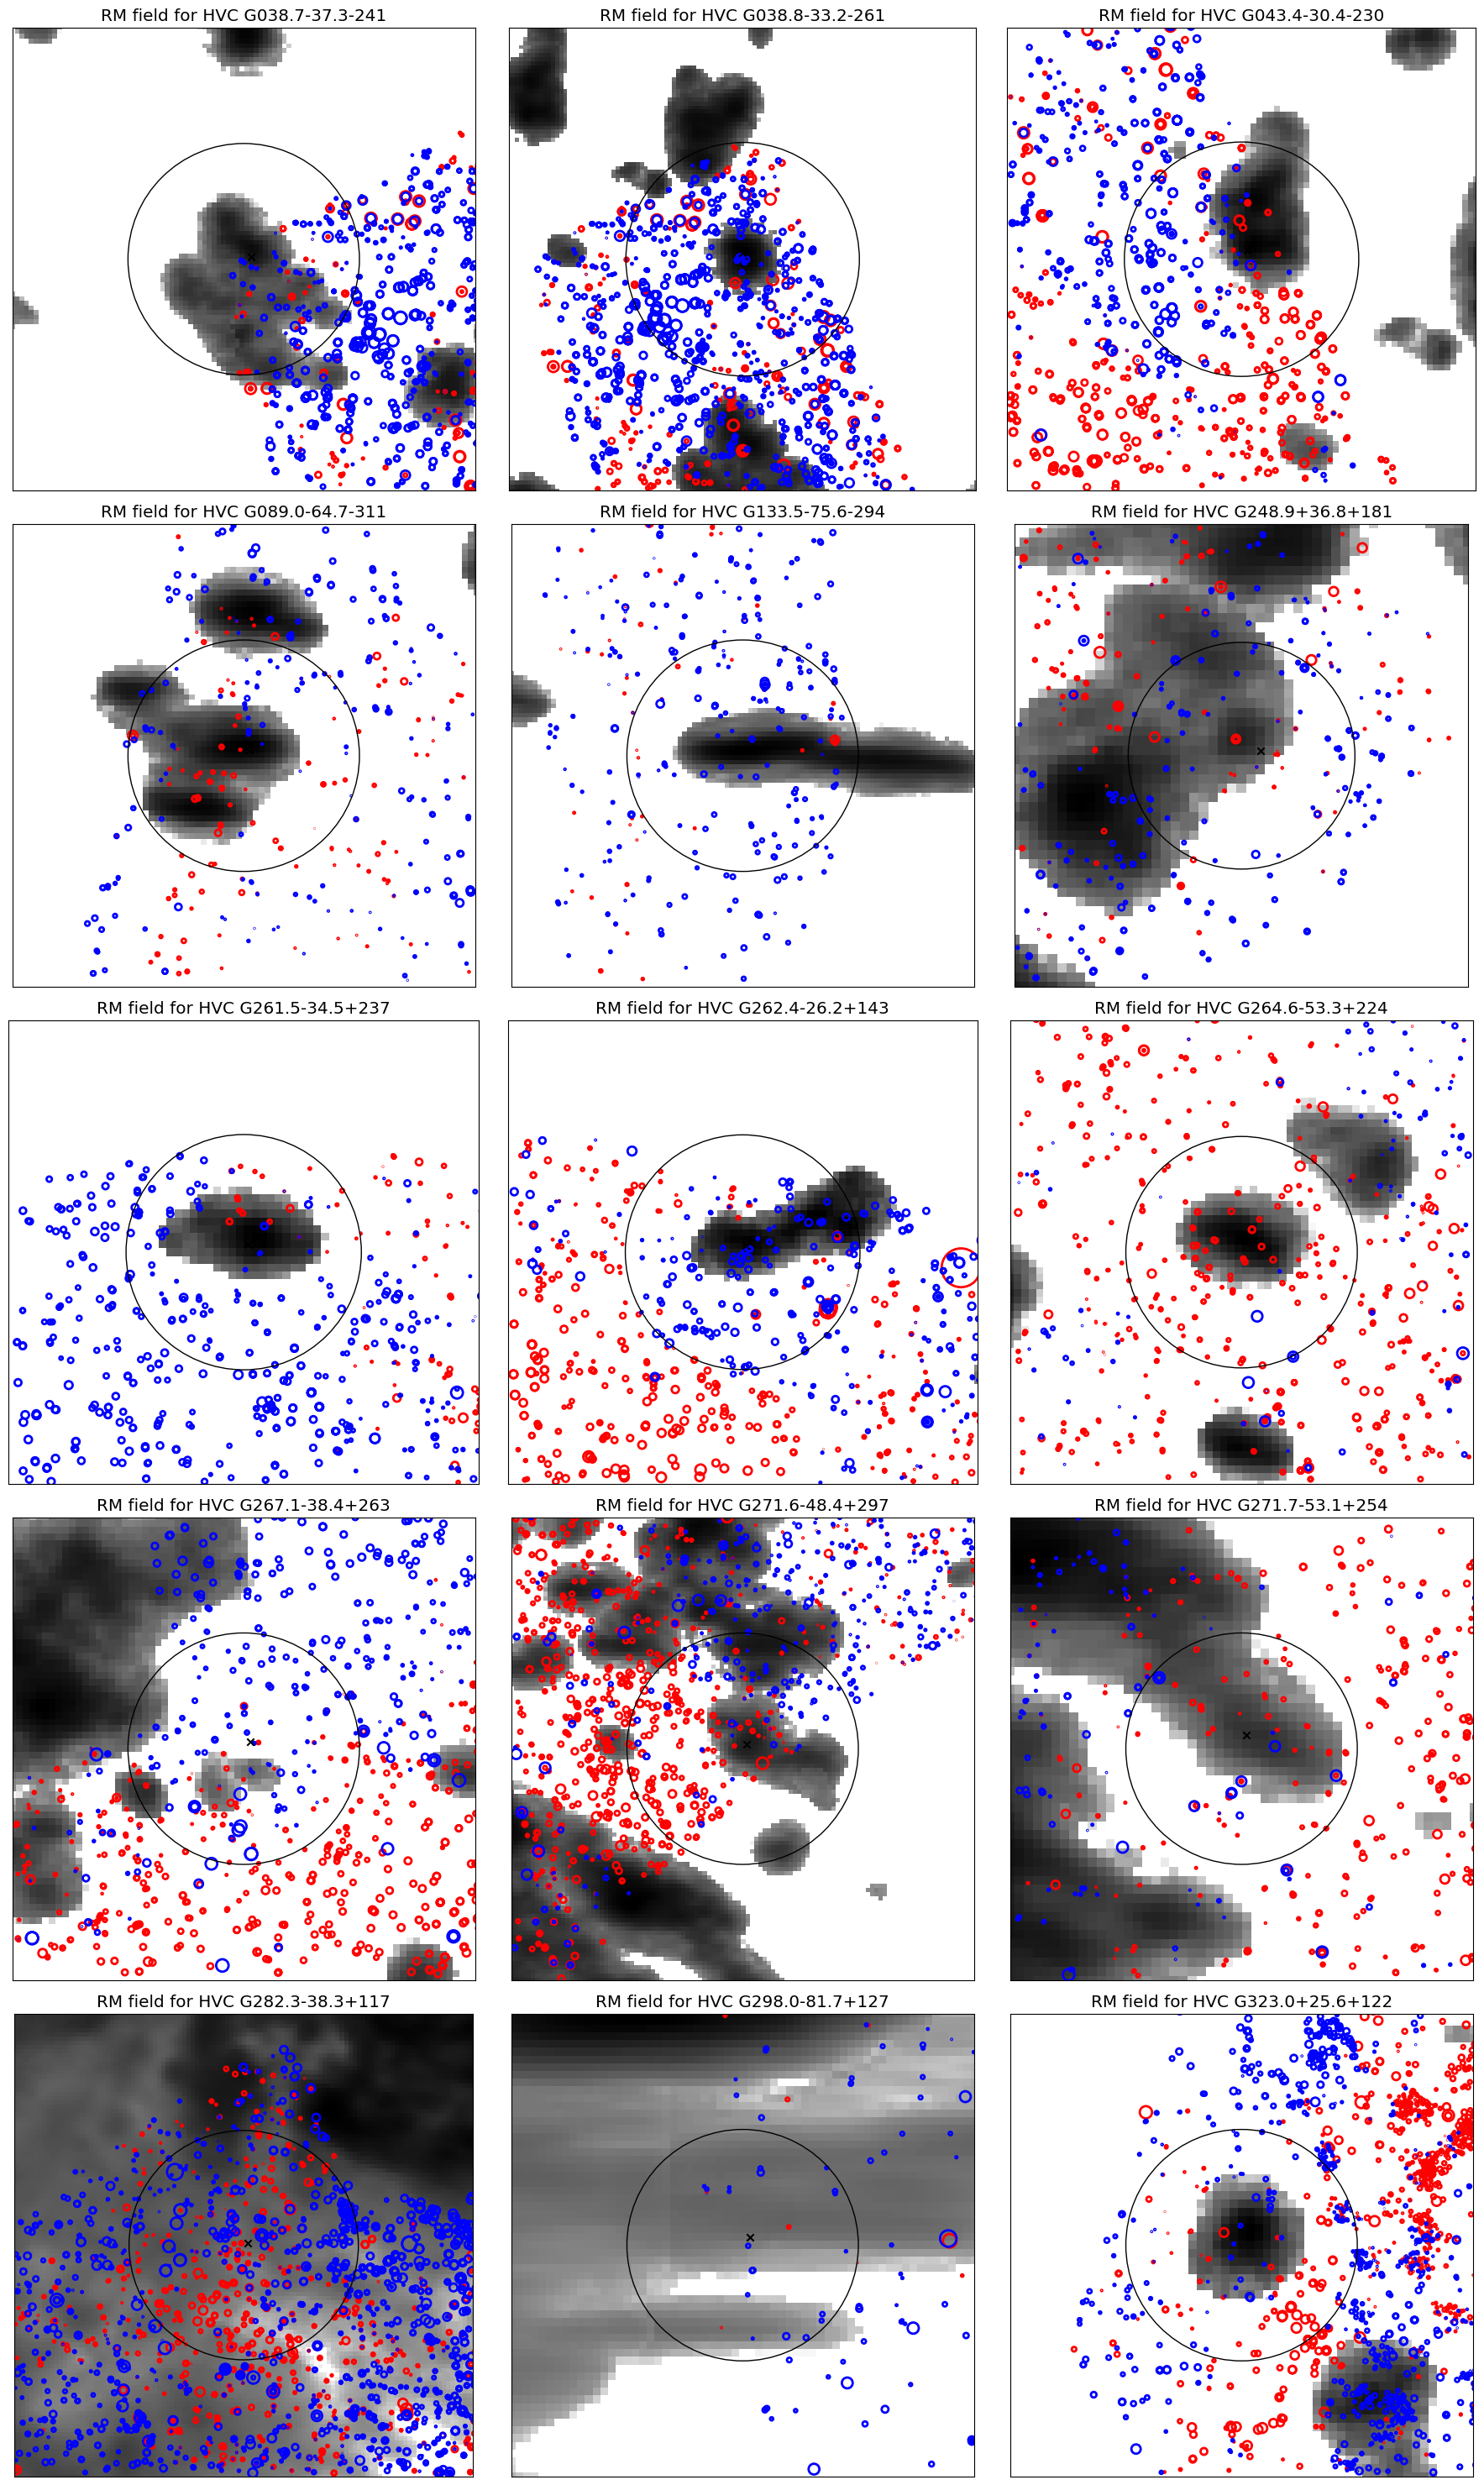

Process complete


In [3]:
from plotting import honours_plot as hplt
from synthesis import hvc_looper as hvcl

snapshot = hvcl.plot_HVC_selection(hvcs, collated_data, plot_cross_source=True, add_circles=True)

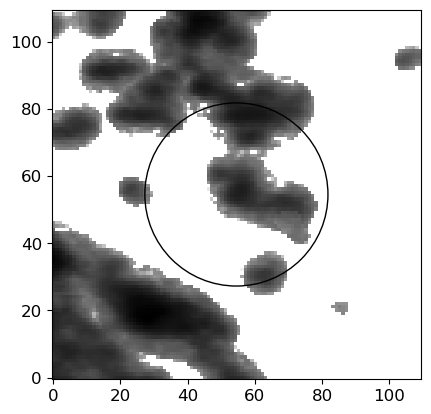

In [4]:
import matplotlib.pyplot as plt

hplt.plot_fits(snapshot[10]["HI"], show=False)
xlim = plt.xlim()
ylim = plt.ylim()
circle = plt.Circle((sum(xlim)/2, sum(ylim)/2), sum(xlim)/4, color='black', fill=False)
plt.gca().add_patch(circle)
plt.show()